# Structure analysis

This notebook presents the tools to analyse the structure of solid solutions.


In [283]:
import sys
sys.path.insert(1, '../../crystal-code-tools/crystal_functions/crystal_functions/')

from crystal_functions.file_readwrite import Crystal_output, write_cry_properties, Crystal_input, write_cry_gui,write_cry_input, Crystal_bands
from crystal_functions.execute import runcry
from crystal_functions.convert import cry_gui2pmg,cry_bands2pmg

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.cif import CifWriter
from ase.visualize import view

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.surface import SlabGenerator
import numpy as np
import pandas as pd

In [46]:
path = '/Users/brunocamino/Desktop/Imperial/cmsg_icl/solid-solutions/data/'
file = 'LTS_CONFCNT_ONLY'

new_atom = 'Li'

In [208]:
struct = Crystal_output('data/calculations/final/LTS_1435_B3LYP_Ahl_b.out')
struct.extract_last_geom(write_gui_file=True)

In [209]:
a = cry_gui2pmg('data/calculations/final/LTS_1435_B3LYP_Ahl_b_last.gui')

In [211]:
view(AseAtomsAdaptor().get_atoms(a))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/test_env...>

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# BANDS

In [204]:
#D
import shutil
band_file = 'data/calculations/bands/band_input.d3'

for structure in selected_structures:
    #shutil.copy(band_file,'data/calculations/bands/LTS_%s_bands.d3'%structure)
    print('/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_%s_doss  LTS_%s_B3LYP_Ahl_b'%(structure,structure))

/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_2_doss  LTS_2_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_119_doss  LTS_119_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_127_doss  LTS_127_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_218_doss  LTS_218_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_348_doss  LTS_348_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_650_doss  LTS_650_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_721_doss  LTS_721_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_840_doss  LTS_840_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_868_doss  LTS_868_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_cx1/v2.2gnu/runpropP LTS_1363_doss  LTS_1363_B3LYP_Ahl_b
/rds/general/user/gmallia/home/CRYSTAL17_c

In [284]:
output = Crystal_output('data/calculations/final/LTS_127_B3LYP_Ahl_b.out')
bands = Crystal_bands('data/calculations/bands/LTS_127_bands.BAND')
cry_bands2pmg(output,bands)

In [286]:
bs = cry_bands2pmg(output,bands)

ValueError: x and y must have same first dimension, but have shapes (119,) and (109, 41)

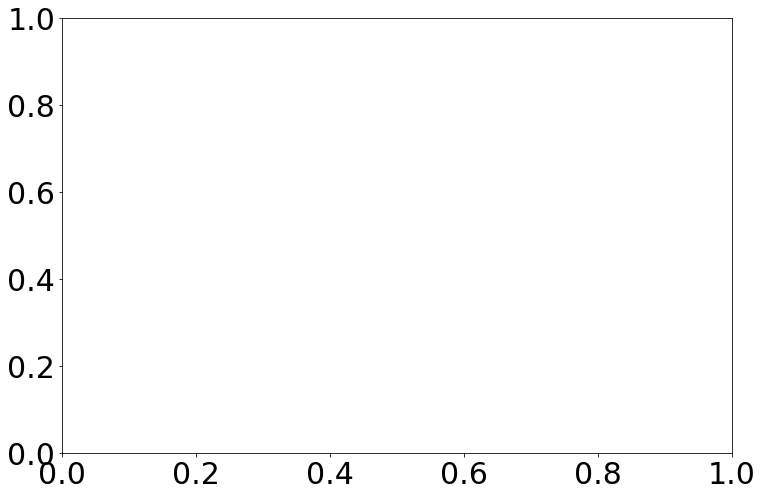

In [287]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
bsplot = BSPlotter(bs)

bsplot.get_plot(ylim=(-10, 10), zero_to_efermi=True)

# DOSS

In [194]:
with open('data/calculations/doss/doss_file.d3') as file:
    data = file.readlines()
data

['NEWK\n',
 '6 12\n',
 '1 0\n',
 'DOSS\n',
 ' 3 200 322 362 1 12 0\n',
 '-18 1 3 5 6 7 9 10 11 12 13 14 16 17 21 22 24 25 27\n',
 '-9 2 4 8 15 18 19 20 23 26\n',
 '-27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54\n',
 'END\n',
 'END\n']

In [203]:
for structure in selected_structures:
    input_dos = data
    structure_n = structure-1
    atomic_n = structures[structure_n].atomic_numbers
    #print(atomic_n)
    data[5] = '-18 '+' '.join(str(x) for x in np.where(np.array(atomic_n) == 3)[0]+1)+ '\n'
    data[6] = '-9 '+' '.join(str(x) for x in np.where(np.array(atomic_n) == 22)[0]+1)+ '\n'
    data[7] = '-27 '+' '.join(str(x) for x in np.where(np.array(atomic_n) == 16)[0]+1)+ '\n'
    with open('data/calculations/doss/LTS_%s_doss.d3'%structure, 'w') as file:
        for line in data:
            file.writelines(line)

## Generate all the possible structures

The structures to be analysed should be organised as a list of pymatgen structures.

There are different ways to be obtain this. In this instance, the XXX option of the CRYSTAL17 code was used.

# Replace witht the CONFCON output file

# List of Li atoms (tmp for paper)

In [47]:
with open('data/Configuration.txt') as file:
    data = file.readlines()
manual_li = []
for line in data:
    if line.lstrip(' ').split(' ')[0] != '\n':
        manual_li.append([int(x) for x in line.rstrip('\n').lstrip(' ').rstrip(' ').split(' ')])


In [48]:
original_structure = cry_gui2pmg('/Users/brunocamino/Desktop/Imperial/cmsg_icl/solid-solutions/data/LTS_CONFCNT_ONLY.gui')
structures = []
ti_atoms = []
li_atoms = []
all_ti = [x for x in range(1,28)]
for j,substitutions in enumerate(manual_li):
    new_structure = original_structure.copy()
    for i in substitutions:
        new_structure.replace(i-1,new_atom)
    structures.append(new_structure)
    ti_atoms.append((np.array([i for i in all_ti if i not in manual_li[j]])-1).tolist())
li_atoms = (np.array(manual_li)-1).tolist()

# List of Li atoms

In [49]:
names = ['data/structures/2.f34', 
         'data/structures/119.f34' , 
         'data/structures/127.f34', 
         'data/structures/218.f34',    
'data/structures/348.f34',
'data/structures/650.f34',  
'data/structures/721.f34',      
'data/structures/840.f34',      
'data/structures/868.f34',         
'data/structures/1363.f34',
'data/structures/1435.f34',
'data/structures/1526.f34',
'data/structures/1639.f34',
'data/structures/1887.f34',
'data/structures/1688.f34',
'data/structures/2312.f34',
'data/structures/3579.f34',
'data/structures/3842.f34',
'data/structures/1126.f34']

In [86]:
selected_structures = []
calculate_structures = [1097,848,880,2801,737]
for i in names:
    selected_structures.append(int(i[16:-4]))
selected_structures = np.array(selected_structures)
selected_structures = selected_structures.tolist()
selected_structures.extend(calculate_structures)
selected_structures

[2,
 119,
 127,
 218,
 348,
 650,
 721,
 840,
 868,
 1363,
 1435,
 1526,
 1639,
 1887,
 1688,
 2312,
 3579,
 3842,
 1126,
 1097,
 848,
 880,
 2801,
 737]

## Distance analysis

In [268]:
coord = 6

li_s_distance_average = []
li_s_distance_min = []
li_s_distance_max = []

ti_s_distance_average = []
ti_s_distance_min = []
ti_s_distance_max = []

for structure in selected_structures:    
    opt_geom = cry_gui2pmg('data/calculations/final/LTS_%s_B3LYP_Ahl_b.gui'%structure)
    li_atoms = np.where(np.array(opt_geom.atomic_numbers) == 3)[0]
    ti_atoms = np.where(np.array(opt_geom.atomic_numbers) == 22)[0]
    s_atoms = np.where(np.array(opt_geom.atomic_numbers) == 16)[0]
    li_s_distances = []
    ti_s_distances = []
    for li_atom in li_atoms:
        for s_atom in s_atoms:
            li_s_distances.append(opt_geom.distance_matrix[li_atom][s_atom])
    li_s_distance_average.append(np.average(np.sort(np.array(li_s_distances))[0:len(li_atoms)*coord]))
    li_s_distance_min.append(np.min(np.sort(np.array(li_s_distances))[0:len(li_atoms)*coord]))
    li_s_distance_max.append(np.max(np.sort(np.array(li_s_distances))[0:len(li_atoms)*coord]))
    for ti_atom in ti_atoms:
        for s_atom in s_atoms:
            ti_s_distances.append(opt_geom.distance_matrix[ti_atom][s_atom])
    ti_s_distance_average.append(np.average(np.sort(np.array(ti_s_distances))[0:len(ti_atoms)*coord]))
    ti_s_distance_min.append(np.min(np.sort(np.array(ti_s_distances))[0:len(ti_atoms)*coord]))
    ti_s_distance_max.append(np.max(np.sort(np.array(ti_s_distances))[0:len(ti_atoms)*coord]))
    
#print(ti_s_distance_average,ti_s_distance_min,ti_s_distance_max)

In [265]:
a = max(np.around(((np.array(ti_s_distance_max)/2.438731)*100)-100,3))
np.sort(np.around(((np.array(ti_s_distance_max)/2.438731)*100)-100,3)/a)

array([0.21834761, 0.30390405, 0.30452016, 0.31185181, 0.31185181,
       0.31185181, 0.31185181, 0.31185181, 0.36762984, 0.37798041,
       0.38607192, 0.38962479, 0.40143347, 0.47678311, 0.575134  ,
       0.65415974, 0.71211468, 0.8090896 , 0.81693467, 0.83057113,
       0.83377488, 0.83476064, 0.93765018, 1.        ])

In [267]:
np.sort(np.around(((np.array(ti_s_distance_max)/2.438731)*100)-100,3))

array([10.632, 14.798, 14.828, 15.185, 15.185, 15.185, 15.185, 15.185,
       17.901, 18.405, 18.799, 18.972, 19.547, 23.216, 28.005, 31.853,
       34.675, 39.397, 39.779, 40.443, 40.599, 40.647, 45.657, 48.693])

## Dataframe distances

In [254]:
df = pd.DataFrame(list(zip(ti_s_distance_average,ti_s_distance_min,ti_s_distance_max,
                           li_s_distance_average,li_s_distance_min,li_s_distance_max)),
                 columns=['Ti-S average','Ti-S min','Ti-S max','Li-S average','Li-S min','Li-S max'],
                 index=selected_structures)
df

,Ti-S average,Ti-S min,Ti-S max,Li-S average,Li-S min,Li-S max
2,2.513907,2.203215,3.121696,2.657878,2.476609,2.960605
119,2.524380,2.211848,3.284352,2.659055,2.506490,3.031644
127,2.486462,2.211321,2.800346,2.597115,2.346490,2.889657
218,2.511078,2.212077,3.626212,2.653242,2.311574,3.484197
348,2.522662,2.208594,3.425028,2.665644,2.482538,3.025510
650,2.522639,2.208197,3.428830,2.665753,2.482435,3.032358
721,2.495579,2.209846,2.875286,2.603160,2.322269,2.970346
840,2.537512,2.208166,3.552181,2.666424,2.469215,3.158455
868,2.483855,2.258656,2.901415,2.600277,2.455273,2.751357
1363,2.486782,2.223719,2.897184,2.601252,2.500145,2.747445


## Dataframe Delta distances

In [278]:
ti_s_delta_distance_average = ((np.array(ti_s_distance_average)/2.438731)-1)*100
ti_s_delta_distance_min = ((np.array(ti_s_distance_min)/2.438731)-1)*100
ti_s_delta_distance_max = ((np.array(ti_s_distance_max)/2.438731)-1)*100

li_s_delta_distance_average = ((np.array(li_s_distance_average)/2.438731)-1)*100
li_s_delta_distance_min = ((np.array(li_s_distance_min)/2.438731)-1)*100
li_s_delta_distance_max = ((np.array(li_s_distance_max)/2.438731)-1)*100

In [279]:
df = pd.DataFrame(list(zip(ti_s_delta_distance_average,ti_s_delta_distance_min,ti_s_delta_distance_max,
                           li_s_delta_distance_average,li_s_delta_distance_min,li_s_delta_distance_max)),
                 columns=['Ti-S average','Ti-S min','Ti-S max','Li-S average','Li-S min','Li-S max'],
                 index=selected_structures)
df

,Ti-S average,Ti-S min,Ti-S max,Li-S average,Li-S min,Li-S max
2,3.082581,-9.657324,28.004951,8.986119,1.553200,21.399400
119,3.512036,-9.303303,34.674634,9.034374,2.778452,24.312350
127,1.957221,-9.324936,14.827990,6.494542,-3.782329,18.490187
218,2.966572,-9.293947,48.692584,8.795989,-5.214074,42.869250
348,3.441592,-9.436772,40.443040,9.304563,1.796317,24.060853
650,3.440660,-9.453045,40.598926,9.309007,1.792096,24.341644
721,2.331057,-9.385421,17.900900,6.742395,-4.775499,21.798845
840,4.050520,-9.454320,45.656946,9.336549,1.249990,29.512231
868,1.850316,-7.383982,18.972318,6.624173,0.678284,12.819210
1363,1.970309,-8.816572,18.798846,6.664175,2.518289,12.658812


### Space group

In [50]:
space_group = []
for structure in structures:
    space_group.append(SpacegroupAnalyzer(structure).get_space_group_number())
#space_group

### Shells

In [51]:
shells = np.unique(np.round(structures[0].distance_matrix[0],decimals=6)).tolist()
shells

[0.0, 2.54275, 3.595992, 4.404172, 5.0855, 5.685762, 6.22844, 7.62825]

### Average Ti-Ti distance

In [52]:
average_ti = []
std_average_ti = []
average_std_ti_combined = []
for n,structure in enumerate(structures):
    average = 0.
    std_average = []
    for i in ti_atoms[n]:
        for j in ti_atoms[n]: 
            if i != j:
                average += round(structure.sites[i].distance(structure.sites[j]),6)
                std_average.append(structure.sites[i].distance(structure.sites[j]))
    average_ti.append(average/(len(ti_atoms[n])**2))
    std_average_ti.append(np.std(std_average))
    average_std_ti_combined.append([average/(len(ti_atoms[n])**2),np.std(std_average)])

In [44]:
np.unique(np.array(std_average_ti),return_counts=True,return_index=True)

(array([], dtype=float64), array([], dtype=int64), array([], dtype=int64))

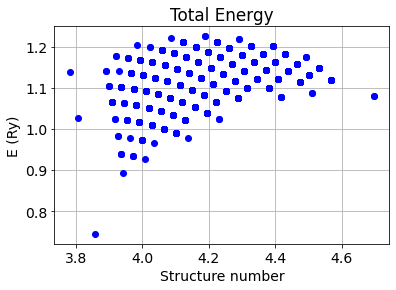

In [13]:
import matplotlib.pyplot as plt

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.plot(average_ti, std_average_ti,'o',c=color[0])
#ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])


ax.set(xlabel='Structure number', ylabel='E (Ry)',
       title='Total Energy')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [257]:
unique_ti_average = np.unique(np.sort(np.array(average_ti)),axis=0)
average_ti_group = []
for i in range(len(structures)):
    average_ti_group.append(np.where(unique_ti_average == average_ti[i])[0][0])

In [54]:
dist_std_unique, dist_std_first, dist_std_occ =  np.unique(np.round(np.array(average_std_ti_combined),6),axis=0,return_counts=True,return_index=True)
dist_std_first

array([1096,  847, 1638,  879,  786,  523,  997,  812,  417, 3260, 1244,
        263, 2800, 1588,  823,  426, 2308,   41, 1370,    9,    4, 1409,
        388,    6,  311,  692, 3898,   12,  420, 2055,  248,  339, 2025,
        110,  157,  421,  159,  319,   20,   15,   56, 1837,  134,   84,
         49,   42,    0,  278, 1052,  181,  166,  414,   22,  261,  148,
         25,   26,    5,   76,  736,  366,   17,   80,    7,   54,   60,
       2693,   45,   32,    3,  132,   36,   44,   14, 3045,   64,   21,
         51,  109,  127,  201,   28,   46,  155,   94,    2,   78, 1315,
        347,   23,    1,  113, 1765,  223, 1657,  499,  839,  126])

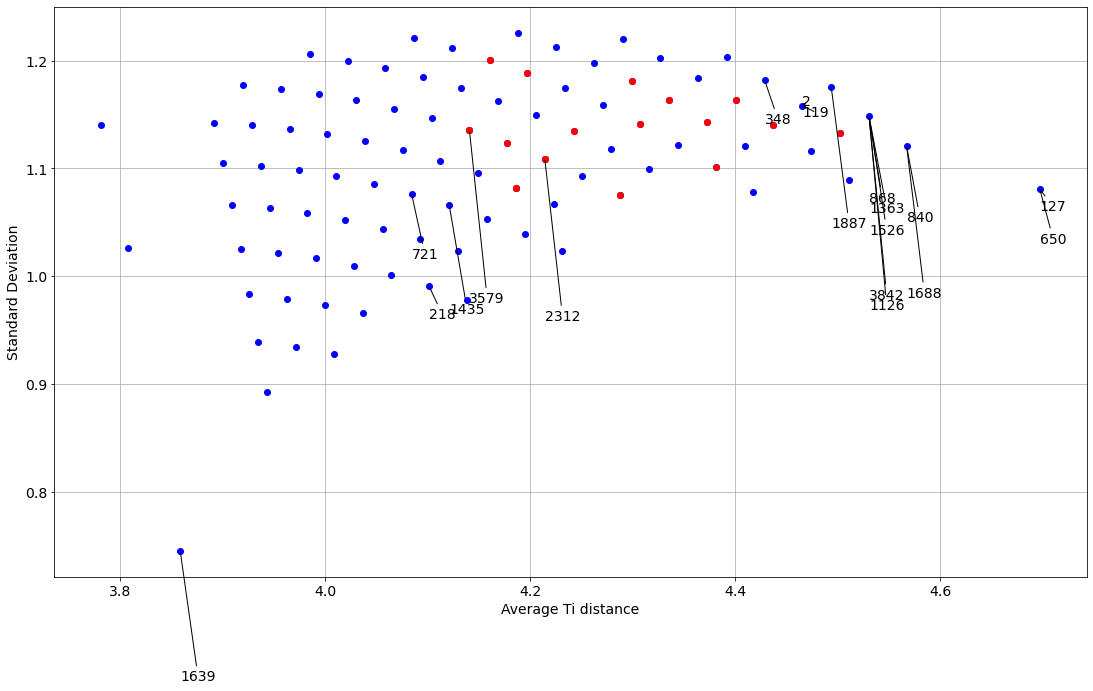

In [14]:
import matplotlib.pyplot as plt


font = {'size'   : 14,
       'weight': 'normal'}

plt.rc('font', **font)

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.plot(dist_std_unique[:,0], dist_std_unique[:,1],'o',c=color[0])
ax.plot(np.array(average_std_ti_combined)[selected_structures,0],
        np.array(average_std_ti_combined)[selected_structures,1],'o',c=color[2])
#label = dist_std_first
label = selected_structures
#ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])


ax.set(xlabel='Average Ti distance', ylabel='Standard Deviation')
ax.grid()

texts = []
another_annotation = '- style'
for i, txt in enumerate(label):
    #ax.annotate(txt, (dist_std_unique[i,0], dist_std_unique[i,1]),)
    x = np.array(average_std_ti_combined)[txt-1,0]
    y = np.array(average_std_ti_combined)[txt-1,1]
    #ax.annotate(txt, (np.array(average_std_ti_combined)[txt-1,0], np.array(average_std_ti_combined)[txt-1,1]),)
    xytext = (x,y-0.01*i)
    ax.annotate(txt,xy=(x,y),xytext=xytext,arrowprops={'arrowstyle':'-'})
fig.set_size_inches(18.5, 10.5)
#fig.savefig("test.png")
plt.show()

In [157]:
view(AseAtomsAdaptor().get_atoms(structures[347]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/test_env...>

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [640]:
dist_std_first/max(dist_std_first)

array([2.81169831e-01, 2.17290918e-01, 4.20215495e-01, 2.25500257e-01,
       2.01641868e-01, 1.34171370e-01, 2.55772191e-01, 2.08311955e-01,
       1.06977937e-01, 8.36326321e-01, 3.19138019e-01, 6.74704977e-02,
       7.18317086e-01, 4.07388404e-01, 2.11133915e-01, 1.09286814e-01,
       5.92098512e-01, 1.05182145e-02, 3.51462288e-01, 2.30887635e-03,
       1.02616727e-03, 3.61467419e-01, 9.95382247e-02, 1.53925090e-03,
       7.97845049e-02, 1.77526937e-01, 1.00000000e+00, 3.07850180e-03,
       1.07747563e-01, 5.27193433e-01, 6.36223704e-02, 8.69676757e-02,
       5.19497178e-01, 2.82195998e-02, 4.02770652e-02, 1.08004105e-01,
       4.07901488e-02, 8.18368394e-02, 5.13083633e-03, 3.84812724e-03,
       1.43663417e-02, 4.71267317e-01, 3.43766034e-02, 2.15495126e-02,
       1.25705490e-02, 1.07747563e-02, 0.00000000e+00, 7.13186249e-02,
       2.69881991e-01, 4.64340688e-02, 4.25859415e-02, 1.06208312e-01,
       5.64391996e-03, 6.69574141e-02, 3.79681888e-02, 6.41354541e-03,
      

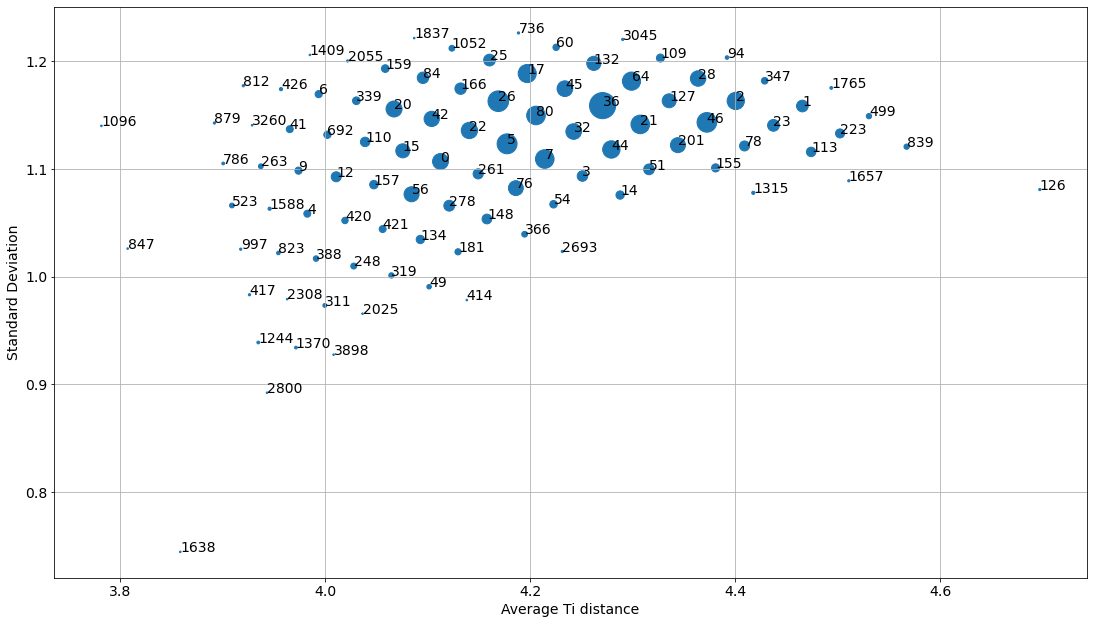

In [55]:
import matplotlib.pyplot as plt


font = {'size'   : 14,
       'weight': 'normal'}

plt.rc('font', **font)

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.scatter(dist_std_unique[:,0], dist_std_unique[:,1],s=dist_std_occ/max(dist_std_first)*10000)
'''ax.plot(np.array(average_std_ti_combined)[selected_structures,0],
        np.array(average_std_ti_combined)[selected_structures,1],'o',c=color[2])'''
label = dist_std_first
#label = selected_structures+1
#ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])


ax.set(xlabel='Average Ti distance', ylabel='Standard Deviation')
ax.grid()

texts = []
another_annotation = '- style'
for i, txt in enumerate(label):
    ax.annotate(txt, (dist_std_unique[i,0], dist_std_unique[i,1]),)
    #x = np.array(average_std_ti_combined)[txt-1,0]
    #y = np.array(average_std_ti_combined)[txt-1,1]
    #ax.annotate(txt, (np.array(average_std_ti_combined)[txt-1,0], np.array(average_std_ti_combined)[txt-1,1]),)
    #xytext = (x,y-0.01*i)
    #ax.annotate(txt,xy=(x,y),xytext=xytext,arrowprops={'arrowstyle':'-'})
fig.set_size_inches(18.5, 10.5)
#fig.savefig("test.png")
plt.show()

In [75]:
len(selected_structures)

24

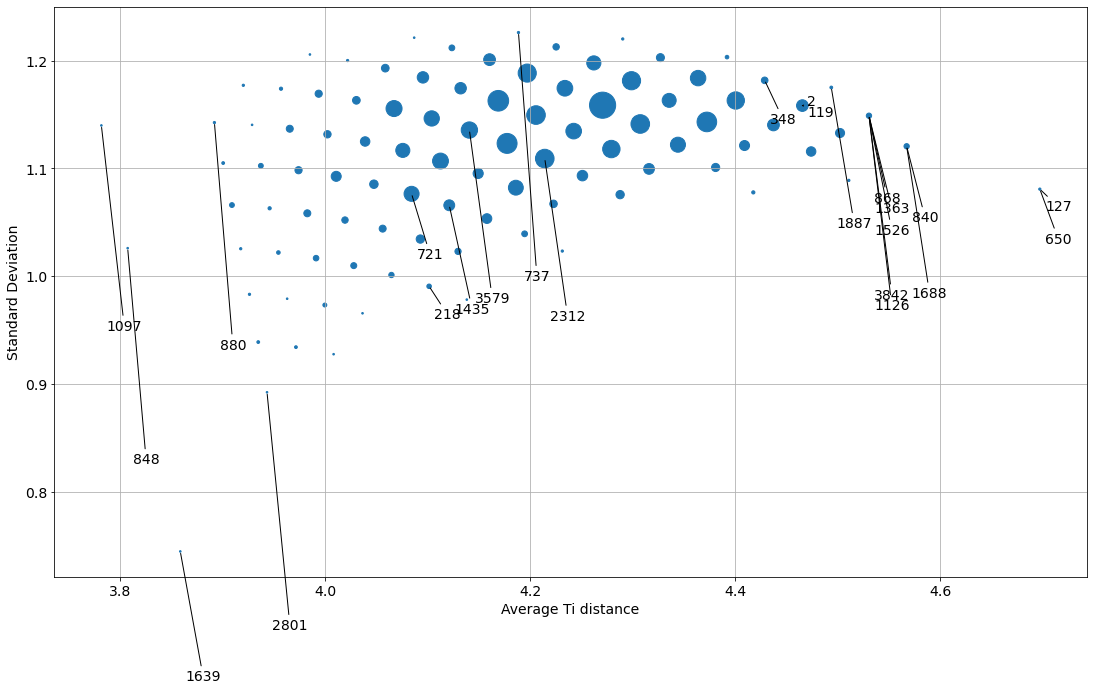

In [147]:
import matplotlib.pyplot as plt


font = {'size'   : 14,
       'weight': 'normal'}

plt.rc('font', **font)

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.scatter(dist_std_unique[:,0], dist_std_unique[:,1],s=dist_std_occ/max(dist_std_first)*10000)
'''ax.plot(np.array(average_std_ti_combined)[selected_structures,0],
        np.array(average_std_ti_combined)[selected_structures,1],'o',c=color[2])'''
label = selected_structures
#label = selected_structures+1
#ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])


ax.set(xlabel='Average Ti distance', ylabel='Standard Deviation')
ax.grid()

texts = []
another_annotation = '- style'

unique_selected = np.unique(np.round(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0],6),
          return_counts=True,return_index=True)[0]
count_selected = np.unique(np.round(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0],6),
          return_counts=True,return_index=True)[2]

for i, txt in enumerate(label):
    #ax.annotate(txt, (dist_std_unique[int(txt),0], dist_std_unique[int(txt),1]),)
    '''ax.annotate(txt, (average_std_ti_combined[int(txt)-1][0],
                      average_std_ti_combined[int(txt)-1][1])
                )'''
    
    x = average_std_ti_combined[int(txt)-1][0]
    y = average_std_ti_combined[int(txt)-1][1]
    
    mult = count_selected[np.where(unique_selected == round(x,6))[0][0]]
    #ax.annotate(txt, (np.array(average_std_ti_combined)[txt-1,0], np.array(average_std_ti_combined)[txt-1,1]),)
    
    xytext = (x+0.005,y+-0.01*i)
    ax.annotate(txt,xy=(x,y),xytext=xytext,xycoords='data',arrowprops={'arrowstyle':'-'})
    #x = np.array(average_std_ti_combined)[txt-1,0]
    #y = np.array(average_std_ti_combined)[txt-1,1]
    #ax.annotate(txt, (np.array(average_std_ti_combined)[txt-1,0], np.array(average_std_ti_combined)[txt-1,1]),)
    #xytext = (x,y-0.01*i)
    #ax.annotate(txt,xy=(x,y),xytext=xytext,arrowprops={'arrowstyle':'-'})
fig.set_size_inches(18.5, 10.5)
#fig.savefig("test.png")
plt.show()

In [122]:
np.argsort(np.array(average_std_ti_combined)[np.array(selected_structures)-1][0])

array([1, 0])

In [133]:
np.argsort(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0])

array([19, 20, 12, 21, 22,  6,  3, 10, 16, 23, 15,  4,  1,  0, 13, 17, 11,
        9,  8, 18, 14,  7,  5,  2])

In [135]:
np.sort(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0])

array([3.78142578, 3.80709748, 3.85844089, 3.8917597 , 3.94310311,
       4.08420681, 4.10132128, 4.12098479, 4.1406483 , 4.18853254,
       4.21420425, 4.4288639 , 4.46564188, 4.46564188, 4.49386262,
       4.53064059, 4.53064059, 4.53064059, 4.53064059, 4.53064059,
       4.56741857, 4.56741857, 4.697416  , 4.697416  ])

In [138]:
np.unique(np.round(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0],6),return_counts=True,return_index=True)

(array([3.781426, 3.807097, 3.858441, 3.89176 , 3.943103, 4.084207,
        4.101321, 4.120985, 4.140648, 4.188533, 4.214204, 4.428864,
        4.465642, 4.493863, 4.530641, 4.567419, 4.697416]),
 array([19, 20, 12, 21, 22,  6,  3, 10, 16, 23, 15,  4,  0, 13,  8,  7,  2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 2, 2]))

In [139]:
b = np.unique(np.round(np.array(average_std_ti_combined)[np.array(selected_structures)-1,0],6))

In [142]:
np.where(b == 3.781426)[0][0]

0

In [21]:
view(AseAtomsAdaptor().get_atoms(structures[649]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/test_env...>

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [457]:
np.unique(np.round(np.array(average_std_ti_combined)[selected_structures,:],6),axis=0, return_counts=True, return_index=True)

(array([[3.858441, 0.744754],
        [4.084207, 1.076456],
        [4.101321, 0.990683],
        [4.120985, 1.065846],
        [4.140648, 1.135615],
        [4.214204, 1.109157],
        [4.428864, 1.181729],
        [4.465642, 1.158305],
        [4.493863, 1.175101],
        [4.50242 , 1.132886],
        [4.530641, 1.148911],
        [4.567419, 1.120583],
        [4.697416, 1.080822]]),
 array([13,  6,  3, 11, 17, 16,  4,  0, 14,  9,  8,  7,  2]),
 array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 2]))

# Group

In [23]:
average_std_group = []
for unique in dist_std_unique:
    average_std_group.append(np.where(np.all(np.round(np.array(average_std_ti_combined),6) == unique,axis=1))[0].tolist())

In [24]:
average_std_group

[[1096],
 [847],
 [1638],
 [879, 2095],
 [786, 2527, 3587],
 [523, 807, 1803, 1990, 2239, 3394, 3486, 3513, 3932],
 [997, 2885],
 [812, 2067],
 [417, 1915],
 [3260],
 [1244, 1384, 2950],
 [263, 629, 902, 994, 1236, 1342, 1944, 3259, 3803],
 [2800],
 [1588, 1722, 2212, 2813],
 [823, 1556, 2111, 2643, 3028],
 [426, 1034, 2536, 3091],
 [2308],
 [41,
  43,
  307,
  652,
  796,
  873,
  976,
  1105,
  1180,
  1290,
  1854,
  1894,
  2234,
  2314,
  2645,
  2794,
  2985,
  3036,
  3311],
 [1370, 2820, 3235],
 [9,
  13,
  40,
  104,
  340,
  1033,
  1037,
  1209,
  1247,
  2502,
  2588,
  2707,
  3107,
  3140,
  3192,
  3282,
  3419,
  3628,
  3870,
  3891],
 [4,
  63,
  628,
  845,
  919,
  1021,
  1366,
  1761,
  1821,
  2263,
  2392,
  2477,
  2753,
  2834,
  3014,
  3213,
  3297,
  3384,
  3570],
 [1409],
 [388, 503, 548, 862, 1128, 1331, 3161, 3176, 3202, 3396, 3800, 3817],
 [6,
  27,
  83,
  627,
  631,
  811,
  1520,
  1740,
  1830,
  1893,
  2112,
  2150,
  3298,
  3464,
  3473,
  348

In [25]:
structs = [126,1096,847,1638]
#structs = [736]
calculate_structures = []
for struct in structs:
    for n, group in enumerate(average_std_group):
        if struct in group:
            calculate_structures.extend(average_std_group[n])

extra_structs = [2800,879,839,2693,736]
for struct in extra_structs:
    calculate_structures.append(struct)

In [79]:
calculate_structures

[1096, 847, 879, 2800, 736]

In [78]:
calculate_structures = [1096,847,879,2800,736]
all_structures = (np.array(calculate_structures)+1).tolist()
all_structures.extend(selected_structures.tolist())
len(all_structures)

AttributeError: 'list' object has no attribute 'tolist'

In [37]:
for j,i in enumerate(np.sort(np.array(calculate_structures))):
    print(i)

736
847
879
1096
2800


In [61]:
for i in calculate_structures:
    print('qcry LTS_%s_B3LYP_Ahl_b 192 24:00'%i)
    print('qsub LTS_%s_B3LYP_Ahl_b.qsub'%i)
#for i in calculate_structures:
   #print('qsub LTS_%s_B3LYP_Ahl_b.qsub'%i)

qcry LTS_1096_B3LYP_Ahl_b 192 24:00
qsub LTS_1096_B3LYP_Ahl_b.qsub
qcry LTS_847_B3LYP_Ahl_b 192 24:00
qsub LTS_847_B3LYP_Ahl_b.qsub
qcry LTS_879_B3LYP_Ahl_b 192 24:00
qsub LTS_879_B3LYP_Ahl_b.qsub
qcry LTS_2800_B3LYP_Ahl_b 192 24:00
qsub LTS_2800_B3LYP_Ahl_b.qsub
qcry LTS_736_B3LYP_Ahl_b 192 24:00
qsub LTS_736_B3LYP_Ahl_b.qsub


In [741]:
np.sort(np.array(all_structures)).tolist()
group = []
for j in np.sort(np.array(all_structures)-1).tolist():
    for i,sublist in enumerate(average_std_group):
        if j in sublist:
            group.append(i)
            
for i in group:
    print(i)

90
90
97
44
88
97
40
59
96
1
95
3
0
95
95
47
95
2
96
92
63
12
52
95


In [10]:
input_cry = Crystal_input('data/calculations/LTS_1435_PBE_Ahl_new.d12')
input_cry.bs_block
for structure in selected_structures:
    #write_cry_input('data/calculations/final/bruno/LTS_%s_B3LYP_Ahl_b.d12'%structure,crystal_input=input_cry)
    #write_cry_gui('data/calculations/final/bruno/LTS_%s_B3LYP_Ahl_b.gui'%str(structure), structures[structure], symm=False)

In [27]:
import shutil
for i in selected_structures:
    shutil.copyfile('data/calculations/final/PBE/LTS_%s_PBE_Ahl_new.f34'%i,'data/calculations/final/bruno/LTS_%s_B3LYP_Ahl_b.gui'%i)
                    
                    
                    

In [671]:
a = cry_gui2pmg('data/calculations/symm/symm/LTS_649.gui')
view(AseAtomsAdaptor().get_atoms(a))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

### Average second coordination 
The number of Ti atoms in the second shell averaged over all Ti atoms

In [19]:
second_coord_sum = []
for n,structure in enumerate(structures):
    sum_coord = 0
    for i in ti_atoms[n]:
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                sum_coord += 1
    second_coord_sum.append(sum_coord)
second_coord_average = (np.array(second_coord_sum)/len(ti_atoms[n])).tolist()


In [20]:
#np.unique(np.array(second_coord_average))

### Average second and fourth coordination 
The number of Ti atoms in the second and fourth shells averaged over all Ti atoms

In [21]:
second_third_coord_sum = []
for n,structure in enumerate(structures):
    sum_coord = 0
    for i in ti_atoms[n]:
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6) or \
             round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                sum_coord += 1
    second_third_coord_sum.append(sum_coord)       
second_third_coord_average = (np.array(second_third_coord_sum)/len(ti_atoms[n])).tolist()

In [22]:
#np.unique(np.array(second_third_coord_average))

### Max and min coordination & Ti distribution

#### Second shell

In [518]:
second_coord_max = []
second_coord_min = []
ti_second_shell_atom = []
n_atoms_second_shell = []
std_n_atoms_second_shell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist = 0
        dist_atom = []
        for j in ti_atoms[n]:
            #if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
            if round(structure.distance_matrix[i][j],6) == round(shells[2],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)
        #print(i,j,distance_atoms)
        distance.append(dist)
        #print(i,j,distance)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    std_n_atoms_second_shell.append(np.std(distance))
    n_atoms_second_shell.append(distance)
    ti_second_shell_atom.append(distance_atoms)
    second_coord_max.append(max(distance))
    second_coord_min.append(min(distance))
average_ti

In [655]:
n_atoms_second_shell[126]

[2, 2, 2, 2, 2, 2, 2, 2, 2]

In [551]:
n_atoms_second_shell[649]

[2, 2, 2, 2, 2, 2, 2, 2, 2]

In [550]:
view(AseAtomsAdaptor().get_atoms(structures[127]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

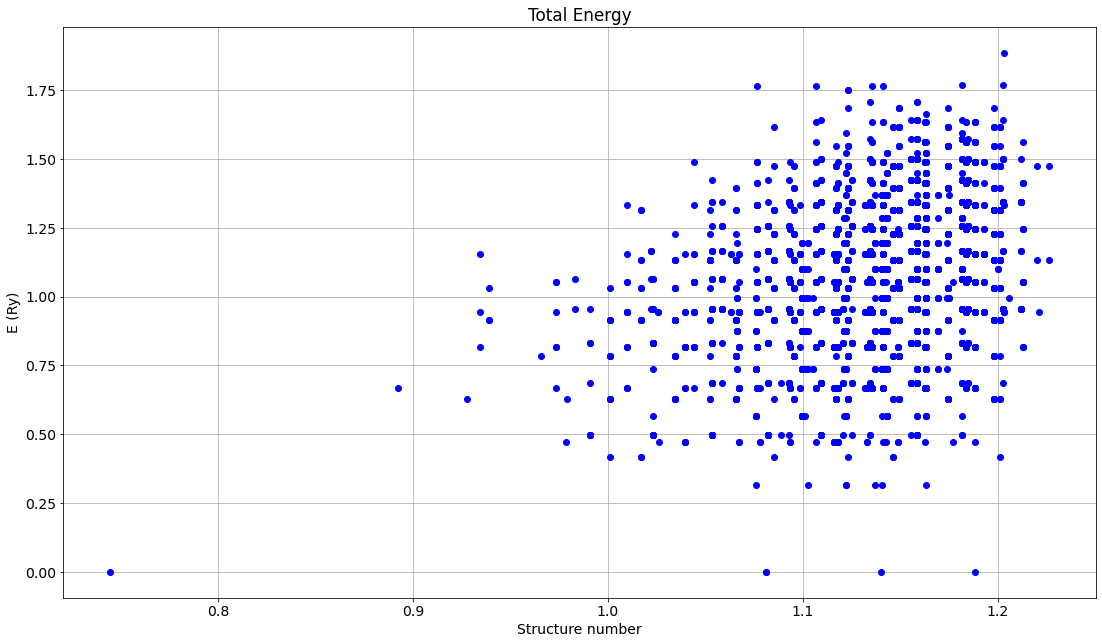

In [546]:
import matplotlib.pyplot as plt

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.plot(std_average_ti, std_n_atoms_second_shell,'o',c=color[0])
#ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])
label = dist_std_first

ax.set(xlabel='Structure number', ylabel='E (Ry)',
       title='Total Energy')
ax.grid()
fig.set_size_inches(18.5, 10.5)
#fig.savefig("test.png")
plt.show()

In [522]:
np.argsort(std_n_atoms_second_shell)

array([1096, 1638,  649, ...,  612, 2738,   94])

In [528]:
view(AseAtomsAdaptor().get_atoms(structures[612]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

In [513]:
unique_coord, first_occ, total_occ = np.unique(np.sort(np.array(n_atoms_second_shell),axis=1),axis=0,return_counts=True,return_index=True)
display(unique_coord)
display(first_occ)
display(total_occ)

array([[0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 6, 6, 7],
       [0, 0, 0, ..., 6, 6, 6],
       ...,
       [2, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]])

array([1096, 2067, 1409, ..., 2516,  414, 1638])

array([1, 1, 1, ..., 1, 1, 1])

In [516]:
np.unique(np.std(np.array(n_atoms_second_shell),axis=1),return_counts=True,return_index=True)

(array([0.        , 0.45812285, 0.47140452, 0.49690399, 0.53287017,
        0.56655772, 0.57735027, 0.59835165, 0.62853936, 0.6573422 ,
        0.66666667, 0.68493489, 0.71145825, 0.73702773, 0.73702773,
        0.74535599, 0.74535599, 0.7617394 , 0.7856742 , 0.8089011 ,
        0.81649658, 0.81649658, 0.83147942, 0.85346064, 0.85346064,
        0.87488976, 0.87488976, 0.8819171 , 0.8819171 , 0.8819171 ,
        0.89580642, 0.91624569, 0.91624569, 0.93623886, 0.93623886,
        0.94280904, 0.94280904, 0.94280904, 0.95581392, 0.97499604,
        0.97499604, 0.97499604, 0.99380799, 0.99380799, 1.        ,
        1.        , 1.0122704 , 1.03040206, 1.03040206, 1.04822013,
        1.05409255, 1.05409255, 1.06574034, 1.08297715, 1.08297715,
        1.09994388, 1.09994388, 1.1055416 , 1.1055416 , 1.11665285,
        1.13311545, 1.13311545, 1.14934227, 1.14934227, 1.15470054,
        1.15470054, 1.16534316, 1.18112731, 1.18112731, 1.19670329,
        1.20185043, 1.20185043, 1.20185043, 1.21

In [51]:
n_atoms_second_shell[126]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [52]:
view(AseAtomsAdaptor().get_atoms(structures[126]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

## Li atoms

In [28]:
li_second_shell_atom = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in li_atoms[n]:
        dist_atom = []
        for j in li_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                dist_atom.append(j)
        distance_atoms.append(dist_atom)
    li_second_shell_atom.append(distance_atoms)


### Find structures belonging to classes based on unique_coordination

Almost identical to the number of atoms in second shell

In [29]:
structure_groups = []
for unique in unique_coord:
    structure_groups.append(np.where(np.all(np.sort(np.array(n_atoms_second_shell),axis=1) == unique,axis=1))[0].tolist())

In [30]:
'''for i,structure_group in enumerate(structure_groups):
    print(total_occ[i])
    for n in structure_group:
        print(names[n][16:-4])
    print('')'''

"for i,structure_group in enumerate(structure_groups):\n    print(total_occ[i])\n    for n in structure_group:\n        print(names[n][16:-4])\n    print('')"

In [31]:
geom_block = ['Classificationtests\n','EXTERNAL\n','EXTPRT\n','OPTGEOM\n','END\n']
bs_block = ['BASISSET\n', 'POV-TZVP\n']
func_block = ['DFT\n', 'B3LYP\n', 'XXLGRID\n', 'ENDDFT\n']
scf_block = [['TOLINTEG\n', '5 5 5 5 10\n'],
             ['SHRINK\n', '4 8\n'],
             ['MAXCYCLE\n', '200\n'],
             ['FMIXING\n', '70\n'],
             'DIIS\n',
             'ENDSCF\n']

cry_input = Crystal_input('data/input.d12')
for i in first_occ:
    name1 = 'data/Ti_S_%s.gui'%i
    name2 = 'data/Ti_S_%s.f34'%i
    write_cry_gui(name1,structures[i],symm=False)
    write_cry_gui(name2,structures[i],symm=False)
    write_cry_input(name1[:-3]+'d12',crystal_input=cry_input)
    #runcry(name1[:-4])
    #CifWriter(structures[i]).write_file(name1[:-3]+'cif')

#### Fourth shell

In [32]:
fourth_coord_max = []
fourth_coord_min = []
ti_fourth_shell_atom = []
n_atoms_fourth_shell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist = 0
        dist_atom = []
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)
        #print(i,j,distance_atoms)
        distance.append(dist)
        #print(i,j,distance)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    n_atoms_fourth_shell.append(distance)
    ti_fourth_shell_atom.append(distance_atoms)
    fourth_coord_max.append(max(distance))
    fourth_coord_min.append(min(distance))


In [33]:
np.unique(np.sort(np.array(n_atoms_fourth_shell),axis=1),axis=0,return_counts=True,return_index=True)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 2],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [2, 3, 3, ..., 3, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]]),
 array([1096, 2067,  812,  426, 1034, 1740, 2055,  811,  159, 2503, 2185,
         967,  360, 1837,   83,    6, 1105,  156,   20,  336,   62, 1121,
         184,  197,   70, 1218,  252,  847,  689, 2884, 1941,  306,   25,
          97,  231,  149, 2239, 1209,   29,  110,   48,  205,  440,  239,
         394,  200,  445,  153,   26,  214,  283, 1622, 1088, 1103,  908,
         738,  625,   58,   35,  268,  467, 1279, 2495, 1132, 1520,   60,
          41,   33,   17,  288,   37,  132,  554,    9, 1537,   30,  386,
          38,  404,   22,   50, 1821,   63,   67,  151,  233,  295,   12,
         435, 1004,  107, 2087,   56,    0,   59,  154,  998,  335,  567,
          15,  136,    5,  510,  420,   44,   88,  388,  548, 2336,  925,
         346, 3040,  129, 2805,   32,  521, 158

#### Combine second shell and fourth shell

In [34]:
second_fourth_coord_max = []
second_fourth_coord_min = []
ti_second_shell_atom = []
ti_fourth_shell_atom = []
ti_second_fourth_shell_atom = []
n_atoms_second_shell = []
n_atoms_fourth_shell = []
n_atoms_second_fourth_shell = []
for n,structure in enumerate(structures):
    distance1 = []
    distance2 = []
    distance_atoms1 = []
    distance_atoms2 = []
    for i in ti_atoms[n]:
        dist1 = 0
        dist2 = 0
        dist1_atom = []
        dist2_atom = []
        for j in ti_atoms[n]:
            #print(i,j,round(structure.sites[i].distance(structure.sites[j]),6))
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                dist1 += 1
                dist1_atom.append(j)
            if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[4],6):
                dist2 += 1
                dist2_atom.append(j)
        distance_atoms1.append(dist1_atom)
        distance_atoms2.append(dist2_atom)
        #print(i,j,distance_atoms)
        distance1.append(dist1)
        distance2.append(dist2)
        #print(i,j,distance1)
        max_coord_atoms = max(enumerate(distance_atoms), key = lambda tup: len(tup[1]))[1]
        atom_coords = []
        '''for atom in max_coord_atoms:
            atom_coords.append(structure.cart_coords[atom].tolist())'''
    distance2 = (np.array(distance2)[np.argsort(distance1)]).tolist()
    distance1.sort()
    distance1.extend(distance2)
    n_atoms_second_shell.append(distance1)
    n_atoms_fourth_shell.append(distance2)
    #ti_second_fourth_shell_atom.append(distance_atoms)
    ti_second_shell_atom.append(distance_atoms1)
    ti_fourth_shell_atom.append(distance_atoms2)
    second_fourth_coord_max.append(max(distance))
    second_fourth_coord_min.append(min(distance))

In [35]:
np.unique(np.array(n_atoms_second_fourth_shell),axis=0,return_counts=True,return_index=True)

(array([], dtype=float64), array([], dtype=int64), array([], dtype=int64))

In [36]:
view(AseAtomsAdaptor().get_atoms(structures[1362]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

## Center of mass

In [160]:
std = [] 
std_sum = []
std_std = []
ti_sum_distance = []
com_diff = []

mass = sum(structure.atomic_numbers)
li_mass = 3*len(li_atoms[0])
ti_mass = 22*len(ti_atoms[0])

for n,structure in enumerate(structures):
    ti_coord = []
    li_coord = []
    all_coord = []
    all_coord_weight = []
    for i in ti_atoms[n]:
        ti_coord.append(structure.cart_coords[i].tolist())
    for j in li_atoms[n]:
        li_coord.append(structure.cart_coords[j].tolist())
    for k in range(structure.num_sites):
        all_coord_weight.append(structure.sites[k].coords*structure.atomic_numbers[k])#/sum(structure.atomic_numbers))
        all_coord.append(structure.sites[k].coords)
    ti_com = np.sum(ti_coord,axis=0)/ti_mass
    li_com = np.sum(li_coord,axis=0)/li_mass
    all_com = np.sum(all_coord_weight,axis=0)/mass
    center = np.sum(all_coord,axis=0)/structure.num_sites
    
    sum_distance = 0
    distances = []
    for i in ti_atoms[n]:
        sum_distance += structure.sites[i].distance_from_point(ti_com)
        distances.append(structure.sites[i].distance_from_point(ti_com))
    ti_sum_distance.append(sum_distance)
    com_diff.append(np.sum((li_com-ti_com)**2))
    
    


In [214]:
np.argsort(ti_sum_distance)

array([1859, 3511, 1158, ...,  542, 3393, 2870])

In [217]:
view(AseAtomsAdaptor().get_atoms(structures[1859]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

In [158]:
np.argsort(com_diff)

array([3472, 1335, 2689, ..., 1833, 2910, 3367])

In [155]:
view(AseAtomsAdaptor().get_atoms(structures[86]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

### Identify colinear structures

#### First method (distance based)

In [506]:
ti_second_shell_atom_cell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in ti_atoms[n]:
        dist = 0
        dist_atom = []
        for j in ti_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j],jimage=[0,0,0]),6) == round(shells[2],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)

        distance.append(dist)

    ti_second_shell_atom_cell.append(distance_atoms)
ti_linear = []
ti_non_linear = []
for n,structure in enumerate(structures):
    line = False
    for i in range(len(ti_atoms[0])):
        for j in ti_second_shell_atom_cell[n][i]:
            for k in ti_second_shell_atom_cell[n][i]:
                if j != k:
                    if round(structure.sites[j].distance(structure.sites[k],jimage=[0,0,0]),5) == round(2*shells[2],5):
                        if n == 1362:
                            print(i,ti_atoms[n][i],j,k,round(structure.sites[j].distance(structure.sites[k],jimage=[0,0,0]),5))
                        line = True
    if line == True:
        ti_linear.append(n)
    else:
        ti_non_linear.append(n)

In [510]:
ti_linear

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 41,
 42,
 43,
 45,
 47,
 48,
 49,
 50,
 51,
 53,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 72,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 120,
 121,
 122,
 124,
 128,
 130,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 151,
 152,
 154,
 156,
 158,
 159,
 162,
 163,
 164,
 165,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 190,
 191,
 192,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 212,
 213,
 215,
 216,
 217,
 218,
 219,
 222,
 224,
 226,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 241,
 242,
 243,
 247,


In [509]:
len(ti_non_linear)

1216

In [38]:
structures[1362][0]

PeriodicSite: Ti (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [39]:
for i in linear:
    print(i+1,end=', ')

1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 42, 43, 44, 46, 48, 49, 50, 51, 52, 54, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 121, 122, 123, 125, 129, 131, 133, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 147, 148, 149, 150, 152, 153, 155, 157, 159, 160, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 182, 183, 184, 185, 187, 188, 189, 191, 192, 193, 195, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 213, 214, 216, 217, 218, 219, 220, 223, 225, 227, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 248, 250, 251, 253, 254, 256, 257, 258, 260, 261, 262, 263, 264, 265, 267, 268, 270, 271, 272, 273, 275, 276, 277, 279, 281, 282, 283, 284, 285, 288, 289, 290, 291, 293, 294, 295, 296,

2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2302, 2303, 2305, 2306, 2307, 2308, 2309, 2311, 2312, 2314, 2315, 2317, 2318, 2319, 2320, 2321, 2322, 2324, 2325, 2326, 2327, 2328, 2330, 2331, 2332, 2334, 2335, 2339, 2342, 2344, 2345, 2346, 2347, 2348, 2351, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2362, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2375, 2376, 2377, 2379, 2380, 2381, 2382, 2385, 2386, 2388, 2390, 2391, 2392, 2393, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2403, 2404, 2405, 2406, 2407, 2410, 2411, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2429, 2430, 2431, 2432, 2433, 2435, 2437, 2438, 2440, 2442, 2445, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2456, 2457, 2458, 2461, 2463, 2464, 2466, 2467, 2468, 2469, 2470, 2472, 2473, 2474, 2477, 2478, 2479, 2480, 2481, 2483, 2484, 2486, 2487, 2488, 2489, 2490, 2496, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2506, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2518

In [195]:
view(AseAtomsAdaptor().get_atoms(structures[0]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

#### Second method (angle based)

In [41]:
linear2 = []
non_linear2 = []
n_lines = []
parallel = []
for n,structure in enumerate(structures[0:100]):
    n_lines_structure = []
    parallel_structure = 0
    line = False
    for i in range(len(ti_atoms[0])):
        for j in ti_second_shell_atom[n][i]:
            for k in ti_second_shell_atom[n][i]:
                if j != k:
                    #print(ti_atoms[n][i],j,k,get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]))
                    #print(ti_atoms[n][i],j,k,np.round(get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]),4))
                    if np.round(get_angle(structure.cart_coords[j],
                                          structure.cart_coords[ti_atoms[n][i]],
                                          structure.cart_coords[k]),4) == 180.0:
                        n_lines_structure.append([ti_atoms[n][i],j,k])
                        #print(np.sort(np.array([ti_atoms[n][i],j,k])))
                        line = True
    #print(np.unique(np.sort(np.array(n_lines_structure)),axis=0))
    #print(np.unique(np.sort(np.array(n_lines_structure))))
    for q,line1 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
        for w,line2 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
            if w > q:
                #print(q,line1,w,line2,len(np.intersect1d(line1,line2)))
                if len(np.intersect1d(line1,line2)) == 0:
                    parallel_structure += 1
    n_lines.append(len(np.unique(np.sort(np.array(n_lines_structure)),axis=0)))
    parallel.append(parallel_structure)
    if line == True:
        linear2.append(n)
    else:
        non_linear2.append(n)

### Li atoms

#### Distance

In [190]:
li_second_shell_atom_cell = []
for n,structure in enumerate(structures):
    distance = []
    distance_atoms = []
    for i in li_atoms[n]:
        
        dist = 0
        dist_atom = []
        for j in li_atoms[n]:
            if round(structure.sites[i].distance(structure.sites[j],jimage=[0,0,0]),6) == round(shells[2],6):
                #print(i,j,structure.sites[i].distance(structure.sites[j]))
                dist += 1
                dist_atom.append(j)
        distance_atoms.append(dist_atom)

        distance.append(dist)

    li_second_shell_atom_cell.append(distance_atoms)

li_linear = []
li_non_linear = []
for n,structure in enumerate(structures):
    line = False
    for i in range(len(li_atoms[0])):
        for j in li_second_shell_atom_cell[n][i]:
            for k in li_second_shell_atom_cell[n][i]:
                if j != k:
                    if round(structure.sites[j].distance(structure.sites[k],jimage=[0,0,0]),5) == round(2*shells[2],5):
                        line = True
    if line == True:
        li_linear.append(n)
    else:
        li_non_linear.append(n)

In [ ]:
li_non_linear

#### Angle

In [107]:
li_linear = []
li_non_linear = []
li_n_lines = []
li_parallel = []
for n,structure in enumerate(structures):
    line = False
    n_lines_structure = []
    parallel_structure = 0
    for i in range(len(li_atoms[0])):
        for j in li_second_shell_atom[n][i]:
            for k in li_second_shell_atom[n][i]:
                if j != k:
                    #print(ti_atoms[n][i],j,k,get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]))
                    #print(ti_atoms[n][i],j,k,np.round(get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]),4))
                    if np.round(get_angle(structure.cart_coords[j],
                                          structure.cart_coords[li_atoms[n][i]],
                                          structure.cart_coords[k]),4) == 180.0:
                        n_lines_structure.append([li_atoms[n][i],j,k])
                        line = True
    
    for q,line1 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
        for w,line2 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
            if w > q:
                #print(q,line1,w,line2,len(np.intersect1d(line1,line2)))
                if len(np.intersect1d(line1,line2)) == 0:
                    parallel_structure += 1
                    #print(parallel_structure)
    li_n_lines.append(len(np.unique(np.sort(np.array(n_lines_structure)),axis=0)))
    #li_parallel.append(np.where(triangular_num == parallel_structure)[0][0])
    li_parallel.append(parallel_structure)
    if line == True:
        li_linear.append(n)
    else:
        li_non_linear.append(n)

### Non ti linear only

In [199]:
li_linear_no_ti = []
li_non_linear_no_ti = []
li_n_lines_no_ti = []
li_parallel_no_ti = []
for n in ti_non_linear:
    structure = structures[n]
    line = False
    n_lines_structure = []
    parallel_structure = 0
    for i in range(len(li_atoms[0])):
        for j in li_second_shell_atom[n][i]:
            for k in li_second_shell_atom[n][i]:
                if j != k:
                    #print(ti_atoms[n][i],j,k,get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]))
                    #print(ti_atoms[n][i],j,k,np.round(get_angle(structure.cart_coords[j],structure.cart_coords[ti_atoms[n][i]],structure.cart_coords[k]),4))
                    if np.round(get_angle(structure.cart_coords[j],
                                          structure.cart_coords[li_atoms[n][i]],
                                          structure.cart_coords[k]),4) == 180.0:
                        n_lines_structure.append([li_atoms[n][i],j,k])
                        line = True
    
    for q,line1 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
        for w,line2 in enumerate(np.unique(np.sort(np.array(n_lines_structure)),axis=0)):
            if w > q:
                #print(q,line1,w,line2,len(np.intersect1d(line1,line2)))
                if len(np.intersect1d(line1,line2)) == 0:
                    if n == 1886:
                        print(q,line1,w,line2)
                    parallel_structure += 1
                    #print(parallel_structure)
    li_n_lines_no_ti.append(len(np.unique(np.sort(np.array(n_lines_structure)),axis=0)))
    #li_parallel.append(np.where(triangular_num == parallel_structure)[0][0])
    li_parallel_no_ti.append(parallel_structure)
    if line == True:
        li_linear_no_ti.append(n)
    else:
        li_non_linear_no_ti.append(n)

0 [ 0 11 19] 1 [2 5 8]
0 [ 0 11 19] 3 [ 2 17 23]
0 [ 0 11 19] 4 [3 4 5]
0 [ 0 11 19] 5 [ 8 17 26]
0 [ 0 11 19] 6 [15 16 17]
0 [ 0 11 19] 8 [18 23 25]
0 [ 0 11 19] 9 [20 23 26]
1 [2 5 8] 6 [15 16 17]
1 [2 5 8] 7 [18 19 20]
1 [2 5 8] 8 [18 23 25]
1 [2 5 8] 9 [20 23 26]
2 [ 2 11 20] 4 [3 4 5]
2 [ 2 11 20] 5 [ 8 17 26]
2 [ 2 11 20] 6 [15 16 17]
2 [ 2 11 20] 8 [18 23 25]
3 [ 2 17 23] 4 [3 4 5]
3 [ 2 17 23] 7 [18 19 20]
4 [3 4 5] 5 [ 8 17 26]
4 [3 4 5] 6 [15 16 17]
4 [3 4 5] 7 [18 19 20]
4 [3 4 5] 8 [18 23 25]
4 [3 4 5] 9 [20 23 26]
5 [ 8 17 26] 7 [18 19 20]
5 [ 8 17 26] 8 [18 23 25]
6 [15 16 17] 7 [18 19 20]
6 [15 16 17] 8 [18 23 25]
6 [15 16 17] 9 [20 23 26]


In [211]:
structures[1886].sites[19]

PeriodicSite: Li (2.5428, 0.0000, -2.5427) [-0.3333, 0.0000, 0.3333]

In [183]:
unique_lines, first_lines, total_lines =  np.unique(np.array(li_n_lines_no_ti),axis=0,return_counts=True,return_index=True)


In [184]:
structure_groups = []
for unique in unique_lines:
    structure_groups.append((np.where(np.array(li_n_lines_no_ti) == unique)[0]-1).tolist())

In [187]:
structure_groups[1]

[60,
 91,
 202,
 344,
 397,
 471,
 516,
 649,
 661,
 738,
 826,
 897,
 955,
 1039,
 1113,
 1126,
 1140]

In [188]:
for n, struc in enumerate(structure_groups):
    print('Number of Li lines ', unique_lines[n])
    print(np.array(non_linear)[struc],end=' ')
    print('\n')

Number of Li lines  5
[ 576 1099 2589 2979 3564 3781] 

Number of Li lines  6
[ 227  338  659 1076 1232 1482 1656 2126 2168 2427 2658 2907 3102 3426
 3702 3740 3795] 

Number of Li lines  7
[  85  221  329  349  412  452  457  470  527  541  582  590  647  673
  697  699  719  772  775  803  836  839  865  903  952  956  998 1109
 1200 1214 1260 1326 1357 1388 1481 1532 1536 1549 1603 1646 1687 1713
 1720 1746 1782 1815 1836 1894 1895 1919 1976 2108 2114 2184 2194 2233
 2237 2269 2359 2383 2442 2454 2493 2504 2520 2530 2558 2579 2632 2635
 2637 2691 2778 2797 2833 2859 2892 2913 2981 3133 3164 3288 3619 3679
 3688 3760 3764 3816 3831 3860 3876 3980 4016] 

Number of Li lines  8
[  44   71   73  117  123  160  203  223  343  381  402  404  466  474
  502  506  517  581  598  616  668  675  721  747  781  789  827  848
  866  888  893  923  928 1020 1023 1065 1078 1133 1136 1140 1145 1149
 1163 1195 1210 1226 1231 1249 1252 1281 1298 1305 1320 1325 1352 1354
 1361 1368 1383 1389 1405 142

In [209]:
structures[1886].cart_coords

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.54275000e+00,  2.54275000e+00,  2.77037472e-33],
       [-2.54275000e+00, -2.54275000e+00, -2.77037472e-33],
       [ 2.54275000e+00,  2.77037472e-33,  2.54275000e+00],
       [ 5.08550000e+00,  2.54275000e+00,  2.54275000e+00],
       [-1.54908493e-16, -2.54275000e+00,  2.54275000e+00],
       [-2.54275000e+00, -2.77037472e-33, -2.54275000e+00],
       [ 1.54908493e-16,  2.54275000e+00, -2.54275000e+00],
       [-5.08550000e+00, -2.54275000e+00, -2.54275000e+00],
       [ 2.77037472e-33,  2.54275000e+00,  2.54275000e+00],
       [ 2.54275000e+00,  5.08550000e+00,  2.54275000e+00],
       [-2.54275000e+00, -1.54908493e-16,  2.54275000e+00],
       [ 2.54275000e+00,  2.54275000e+00,  5.08550000e+00],
       [ 5.08550000e+00,  5.08550000e+00,  5.08550000e+00],
       [-1.54908493e-16, -1.54908493e-16,  5.08550000e+00],
       [-2.54275000e+00,  2.54275000e+00, -1.54908493e-16],
       [ 1.54908493e-16,  5.08550000e+00

In [212]:
view(AseAtomsAdaptor().get_atoms(structures[1886]))

<Popen: returncode: None args: ['/Users/brunocamino/miniconda3/envs/cc/bin/p...>

#### Std of number of atoms second shell

In [47]:
np.std(np.unique(np.sort(np.array(n_atoms_second_shell),axis=1),axis=0,return_counts=True)[0],axis=1)

array([3.        , 2.60104442, 2.46205776, ..., 0.57735027, 0.47140452,
       0.        ])

### Individual distances

#### Sum distribution, average distance

In [48]:
sum_distances = []
average_distances = []
std_distances = []
centroid_dev = []
single_dist_final = []
single_dist_all_sorted = []
single_dist_final_flat = []
for n,structure in enumerate(structures):
    average_distances_atom = []
    sum_distances_atom = []
    centroid_dev_atom = []
    single_dist_atom = []
    single_dist_atom_ext = []
    #std_distances_atom = []
    ti_dist_ext = []
    for i in range(len(ti_atoms[n])):
        dist = 0
        atom_coord = []
        ti_dist = []
        for j in ti_second_shell_atom[n][i]:
            atom_coord.append(structure.cart_coords[j].tolist())
            single_dist = []
            for k in ti_second_shell_atom[n][i]:
                if j != k:
                    single_dist.append(round(structure.sites[j].distance(structure.sites[k]),6))
                    dist += round(structure.sites[j].distance(structure.sites[k]),6)
            single_dist.sort()
            #print(single_dist)
            ti_dist.append(single_dist)
            ti_dist_ext.extend(single_dist)
        ti_dist.sort()
        ti_dist_ext.extend([item for sublist in ti_dist for item in sublist])
        #print(ti_dist)
        #center = centroidnp(np.array(atom_coord))
        '''centroid_dev_atom.append(\
            np.sqrt(
                ((center-structure.cart_coords[j])[0])**2 \
            + ((center-structure.cart_coords[j])[1])**2 \
            + ((center-structure.cart_coords[j])[2])**2)
        )'''
        #std.append(np.std(atom_coord,axis=0))
        average_distances_atom.append(dist/len(ti_second_shell_atom[n][i]))
        sum_distances_atom.append(dist)
        single_dist_atom.append(ti_dist)
        single_dist_atom_ext.extend(ti_dist)
        #####TEST
        sorted_indices = np.argsort(n_atoms_second_shell[n])
        single_dist_sorted = []
        for i in sorted_indices:
            single_dist_sorted.extend(ti_dist_ext)
        #print(np.sort(np.sort(single_dist_final[n][i]),axis=0))
        single_dist_all_sorted.append(single_dist_sorted)

        ####
    sum_distances.append(sum_distances_atom)
    average_distances.append(average_distances_atom)
    centroid_dev.append(centroid_dev_atom)
    single_dist_final.append(single_dist_atom) #THIS ONE
    #print(ti_dist_ext)
    single_dist_final_flat.append(ti_dist_ext) #THIS ONE
    #std_distances.append(std)
        #print(i,j,len(ti_second_shell_atom[n][i]),dist)
#print(len(single_dist_all_sorted))
#print(single_dist_final_flat)

ZeroDivisionError: division by zero

In [ ]:
single_dist_final[0]

In [ ]:
np.where(np.sort(np.array(n_atoms_second_shell),axis=1) == unique_coord[0])

In [ ]:
a = np.sort(np.array(n_atoms_second_shell),axis=1)
#np.all(np.sort(np.array(n_atoms_second_shell),axis=1) == unique_coord[0])
np.where((a == unique_coord[3]).all(axis=1))[0]
np.where(np.all(a == unique_coord[0],axis=1))

In [ ]:
'''for i,structure_group in enumerate(structure_groups):
    print('Group ',i)
    for x in structure_group:
        print(x, end=', ')
    print('\n')'''

In [ ]:
coord_group_all = []
for structure_group in structure_groups:
    coord_group = []
    for n in structure_group:
        coord_group.append(single_dist_final_flat[n])
    coord_group_all.append(coord_group)


In [ ]:
np.unique(np.array(coord_group_all[0]),axis=0)
unique_coord_dist = np.unique(np.array(coord_group_all[1]),axis=0)#,return_counts=True,return_index=True)
len(unique_coord_dist)

In [ ]:
np.where(np.all(np.sort(np.round(sum_distances,6),axis=1)==np.sort(np.round(sum_distances,6),axis=1)[0]))
sum_distances_sorted = np.sort(np.round(sum_distances,6),axis=1)
average_distances_sorted = np.sort(np.round(average_distances,6),axis=1)

In [ ]:
np.unique(sum_distances_sorted,axis=0, return_counts=True)

In [ ]:
np.unique(average_distances_sorted,axis=0, return_counts=True)

In [ ]:
magic_index = n_atoms_second_shell-(np.array(sum_distances)/np.amax(sum_distances[1]))

In [ ]:
magic_index

In [ ]:
magic_index[0]

In [ ]:
#second_coord_max

#### Fourth shell

In [ ]:
fourth_coord_max = []
for n,structure in enumerate(structures):
    sum_coord = []    
    for i in ti_atoms[n]:
        sum_coord_atom = 0
        for j in ti_atoms[n]:
            sum_coord_atom += (round(structure.distance_matrix[i][j],6) == round(shells[2],6))
            sum_coord_atom += (round(structure.distance_matrix[i][j],6) == round(shells[4],6))
        sum_coord.append(sum_coord_atom)
    fourth_coord_max.append(max(sum_coord))

### Standard deviation

#### Cartesian coordinates

In [ ]:
std = [] 
std_sum = []
std_std = []

#for n,structure in enumerate(structures):
#for n in first_occ:
for n in range(4023):
    ti_coord = []
    for i in ti_atoms[n]:
        ti_coord.append(structures[n].cart_coords[i].tolist())
    
    std.append(np.std(ti_coord,axis=0).tolist())
    std_sum.append(np.sum(np.std(ti_coord,axis=0)))
    std_std.append(np.std(np.std(ti_coord,axis=0)))
display(np.unique(std,axis=0))
display(np.unique(std_sum))
display(np.unique(std_std))

display(np.array(std_sum)/np.max(std_sum))

In [ ]:
np.array(structures[first_occ]

#### Spherical coordinates

In [ ]:
distribution_com = [] 
for n,structure in enumerate(structures[0:100]):
    ti_coord = []
    ti_coord_sph = []
    for i in ti_atoms[n]:
        ti_coord.append(structure.cart_coords[i].tolist())
    centroid = centroidnp(np.array(ti_coord))
    ti_coord = ti_coord - centroid
    for coord in ti_coord:
        ti_coord_sph.append(cart2sph(coord[0],coord[1],coord[2]))
    print(np.std(ti_coord_sph,axis=0))
        

### Compare energies

In [ ]:
with open('data/Energies.txt') as file:
    data = file.readlines()
structure_index = []
energy = []
for i in range(len(data)):
    structure_index.append(int(data[i][:-2].split('\t-')[0]))
    energy.append(float(data[i][:-2].split('\t-')[1]))

np.array(structure_index)[np.argsort(np.array(structure_index))]
energy_sorted = np.array(energy)[np.argsort(np.array(structure_index))]*27.2114/2
#(max(energy_sorted)-min(energy_sorted))*27.2114/2

#### Check energy of 1 structure per class

In [ ]:
energy_list = []
for i in first_occ:
    energy_list.append(energy_sorted[i]*27.2114/2)
np.array(energy_list)-np.max(np.array(energy_list))

#### Variability inside class

In [ ]:
average_energy_group = []
max_min_group = []
std_group = []
for structure_group in structure_groups:
    average_energy_group.append(np.average(np.array(energy_sorted)[structure_group]))
    max_min_group.append(np.amax(np.array(energy_sorted)[structure_group])-np.amin(np.array(energy_sorted)[structure_group]))
    std_group.append(np.std(np.array(energy_sorted)[structure_group]))
average_energy_group
(np.array(max_min_group)*27.2114/2)
#std_group

#### Check energy of linear vs non linear

In [ ]:
e_linear = np.array(energy_sorted)[linear]
e_non_linear = np.array(energy_sorted)[non_linear]
#np.max(e_non_linear)-np.min(e_non_linear)
#np.max(e_linear)-np.min(e_linear)
(np.average(e_linear)-np.average(e_non_linear))*27.2114/2

In [ ]:
import matplotlib.pyplot as plt

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
ax.plot(linear, e_linear,'o',c=color[0])
ax.plot(non_linear, e_non_linear,'o',c=color[1])
#ax.plot(np.arange(4023), energy_sorted,'o',c=color[1])
#ax.plot(average_ti,energy_sorted ,'o',c=color[1])


ax.set(xlabel='Structure number', ylabel='E (Ry)',
       title='Total Energy')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

color = ['b','g','r','c','m','y','k','tab:orange']
fig, ax = plt.subplots()
for i, structure_group in enumerate(structure_groups):
    ind = structure_group
    E = np.array(energy_sorted)[structure_group]

    
    ax.plot(ind, E,'o',c=color[i])

ax.set(xlabel='Structure number', ylabel='E (Ry)',
       title='Total Energy')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
len(structure_groups)

### Planes

In [ ]:
slab = SlabGenerator(SpacegroupAnalyzer(structures[300]).get_conventional_standard_structure(),[1,0,0],10,10).get_slab()
#view(AseAtomsAdaptor().get_atoms(SpacegroupAnalyzer(structures[3000]).get_conventional_standard_structure()))
#view(AseAtomsAdaptor().get_atoms(slab))
len(slab)

### Distance periodic site

In [ ]:
coordination = [] 
for n,structure in enumerate(structures):
    second_coord = 0
    for i in ti_atoms[n]:        
        for j in ti_atoms[n]:
            if i != j:
                if round(structure.sites[i].distance(structure.sites[j]),6) == round(shells[2],6):
                    second_coord += 1
    #coordination.append(second_coord/len(ti_atoms[n]))
    coordination.append(second_coord)
                
coordination      

### Scan along row

#### Shells

In [ ]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    if np.around(az,6) ==  np.around(2*np.pi,6) \
    or np.around(az,6) ==  -np.around(2*np.pi,6):
        az = 0.
    return [round(az,6), round(el,6), round(r,6)]

In [ ]:
def cart2cent2sph(atom,center):
    x = atom[0]-center[0]
    y = atom[1]-center[1]
    z = atom[2]-center[2]
    return cart2sph(x, y, z)

In [ ]:
def cart2sin(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.sin(np.arctan2(z, hxy))
    az = np.cos(np.arctan2(y, x))
    return [round(az,6), round(el,6), round(r,6)]

In [ ]:
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    sum_z = np.sum(arr[:, 2])
    return np.array([sum_x/length, sum_y/length, sum_z/length])

In [ ]:
def get_angle(a,b,c):

    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [ ]:
def triangular_numbers(n):
    i, t = 1, 0
    while i <= n:
        yield t
        t += i
        i += 1

triangular_num = np.array(list(triangular_numbers(30)))

In [ ]:
#Spherical coordinates
#Make sure there are no gaps even if they have the same polar and azimuthal coords
max_row = []
for n,structure in enumerate(structures[3000:3001]):
    for i in ti_atoms[n]:
        spherical_coord = []
        row = []
        for j in ti_atoms[n]:
            #print(i,j)
            center_cart = structure.cart_coords[j]-structure.cart_coords[i]
            spherical_coord.append(cart2sph(center_cart[0],center_cart[1],center_cart[2]))   
        spherical_coord = np.around(np.array(spherical_coord),6)
        #print(spherical_coord[:,0:1],spherical_coord[:,0:1]+np.pi)
        for el in spherical_coord:
            #print(el[0:3],spherical_coord[:,0:3])
            #print(spherical_coord[:,0:2] == el[0:2],np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1)))
            #print(np.sum(np.multiply(spherical_coord[:,0] == el[0]+np.pi,spherical_coord[:,1] == -el[1])))
            row.append(np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1)))#+
                 #np.sum(np.multiply(spherical_coord[:,0] == el[0]+np.pi,spherical_coord[:,1] == -el[1])))
    max_row.append(max(row)+1)       
       

In [ ]:
#Sinusoidal coordinates
max_row = []
for n,structure in enumerate(structures[3000:3001]):
    for i in ti_atoms[n]:
        spherical_coord = []
        row = []
        #print(i)
        for j in ti_atoms[n]:
            #print(i,j)
            center_cart = structure.cart_coords[j]-structure.cart_coords[i]
            spherical_coord.append(cart2sin(center_cart[0],center_cart[1],center_cart[2]))   
        spherical_coord = np.around(np.array(spherical_coord),6)
        #print(spherical_coord)
        for el in spherical_coord:
            #print(spherical_coord[:,0:3])
            #print(spherical_coord[:,0:2] == el[0:2],np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1))) 
            row.append(np.sum(np.prod(spherical_coord[:,0:2] == el[0:2],axis=1))+
                 np.sum(np.prod(spherical_coord[:,0:2] == -el[0:2],axis=1)))
    max_row.append(max(row)+1)       
       

In [ ]:
#get neighbours
max_radius = max(np.sum(structure.lattice.matrix,axis=1))
for n,structure in enumerate(structures[0:1]):
    for i in ti_atoms[n]:
        #print(structure.get_neighbor_list(max_radius)[3])
        for neigh in structure.get_neighbors(structure.sites[i],max_radius):
            if neigh.as_dict()['species'][0]['element'] == 'Ti':
                
        #for j in ti_atoms[n]:
            #if i != j:
                #print(structure.get_neighbors(structure.sites[i],3.))
#len(structure.get_all_neighbors(10.)[0])

# Neighbour analysis and classification

In [ ]:
shells

In [ ]:
ti_neigh_list = []
for i,structure in enumerate(structures[0:1]):
    for ti_atom_1 in ti_atoms[i]:
        ti_neigh = []
        for ti_atom_2 in ti_atoms[i]:
            if structure.distance_matrix[ti_atom_1][ti_atom_2] - shells[2] < 0.001:
                ti_neigh.append(cart2cent2sph(structure.cart_coords[ti_atom_2],structure.cart_coords[ti_atom_1]))
        ti_neigh_list.append(ti_neigh)
ti_neigh_list

In [ ]:
structures[0]

In [ ]:
structures[0].distance_matrix

### Fourier transform

In [ ]:
ti_coord = []
for i in ti_atoms[0]:
    ti_coord.append(structures[0].sites[i].coords.tolist())
np.fft.fftn(np.array(ti_coord))

In [ ]:
df = pd.DataFrame(list(zip(space_group,average_ti,second_coord_sum,second_coord_max,fourth_coord_max)),
               columns =['Space Group','Average Ti distance','Sum second coord','Max second coord','Max fourth coord'])

df[df['Space Group'] == 1]
df